In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [133]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Species'])
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/Users/masakisato/go/src/github.com/taisa831/ml/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


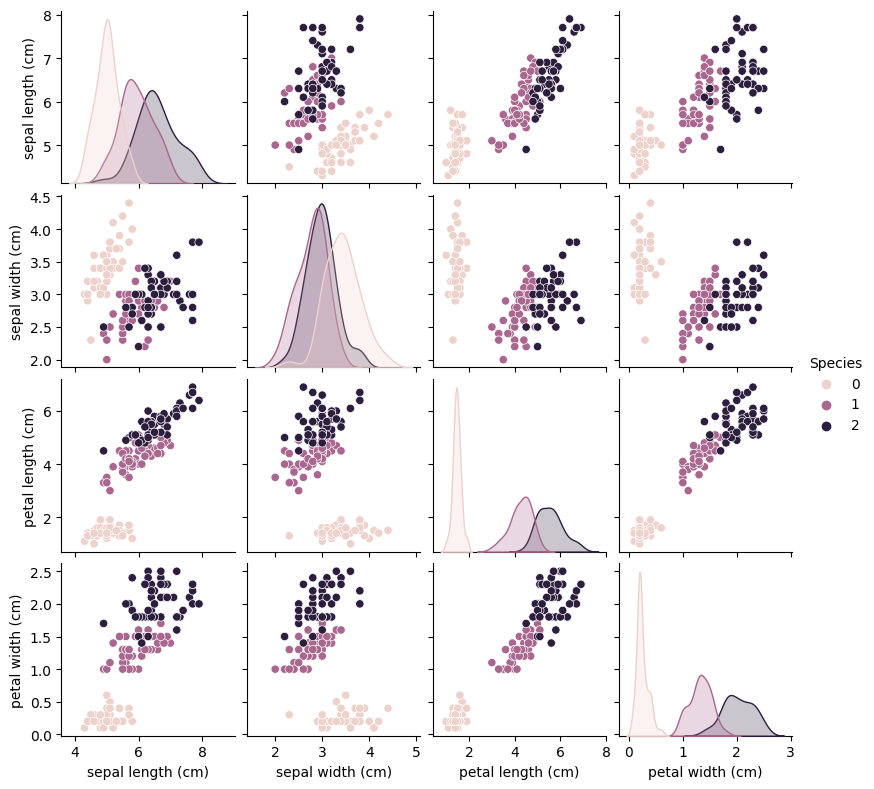

In [65]:
import seaborn as sns

sns.pairplot(df, hue='Species', hue_order=['Setosa', 'Veriscolour', 'Virginica'], size=2)

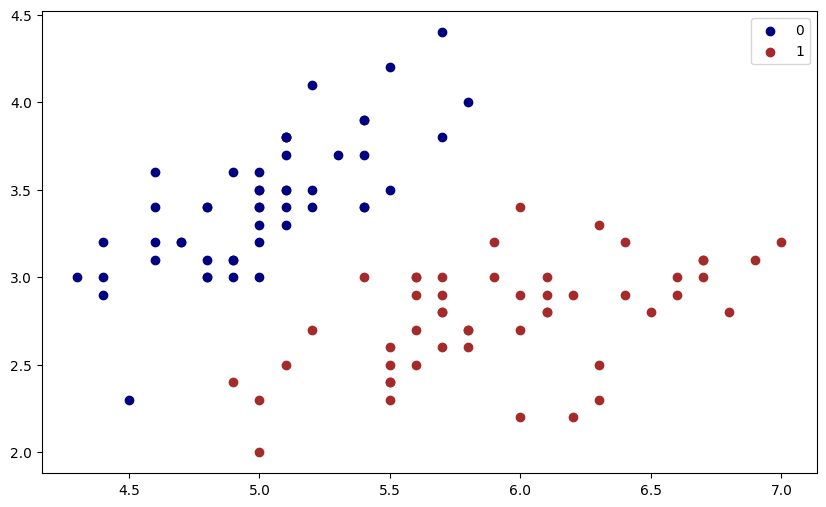

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, :2]
y = np.where(iris.target == 0, 0, 1)
y = iris.target
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='navy', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='brown', label='1')
plt.legend()

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

logreg = LogisticRegression()

# テストデータは全体のうち3割を用いる
x_train, x_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=3)
logreg.fit(x_train, y_train)

# 正解率(accuracy_score）を出す
y_pred = logreg.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7777777777777778

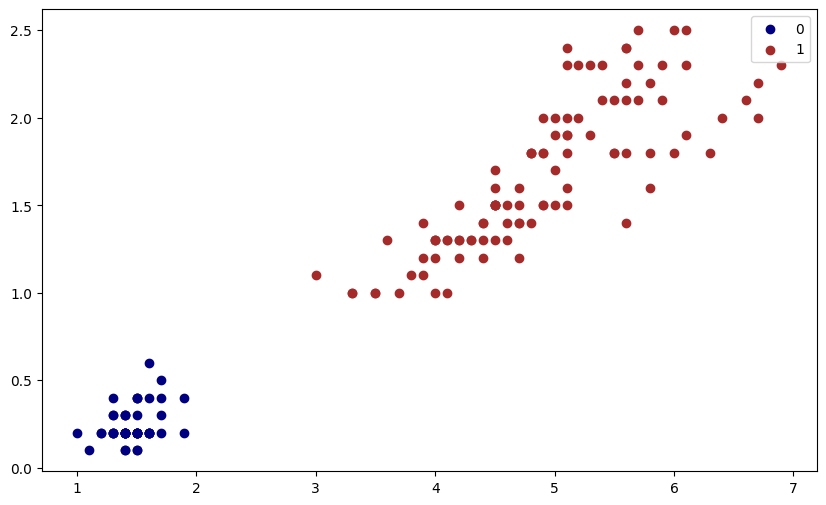

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, 2:4]
y = np.where(iris.target == 0, 0, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='navy', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='brown', label='1')
plt.legend()

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

logreg = LogisticRegression()

# テストデータは全体のうち3割を用いる
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=3)
logreg.fit(x_train, y_train)

# 正解率(accuracy_score）を出す
y_pred  =logreg.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [156]:
import numpy as np
from sklearn.datasets import load_iris


def add_intercept(X):
  intercept = np.ones((X.shape[0], 1))
  return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
  '''シグモイド関数'''
  return 1 / (1 + np.exp(-z))

def cross_entropy(h, y):
  '''交差エントロピー誤差'''
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def predict_prob(X, theta):
  '''交差エントロピー誤差が一番小さい最新の重みを利用してXのデータから確率の予測値を出力する'''
  X = add_intercept(X)
  return sigmoid(np.dot(X, theta))

def predict(X, theta):
  return predict_prob(X, theta).round()


lr=0.1
iter_nums = 300000

X = add_intercept(X)

theta = np.zeros(X.shape[1])

for i in range(iter_nums):
  z = np.dot(X, theta)
  h = sigmoid(z)

  gradient = np.dot(X.T, (h - y)) / y.size

  theta = theta - lr * gradient

  loss = cross_entropy(h, y)
  if (i % 10000 == 0):
    print(f'loss: {loss} \t')

iris = load_iris()
X = iris.data[:, :2]
predict_prob(X, theta)
predict(X, theta)


loss: 0.6931471805599454 	
loss: 0.0343280863464234 	
loss: 0.028787025832133484 	
loss: 0.025718807764277145 	
loss: 0.023408635212947154 	
loss: 0.021507199017176973 	
loss: 0.01989251759083062 	
loss: 0.01850329552876694 	
loss: 0.017299305807070176 	
loss: 0.01624983679491447 	
loss: 0.015329924723359773 	
loss: 0.014518909844335941 	
loss: 0.013799672865938832 	
loss: 0.013158067641994323 	
loss: 0.01258242956532894 	
loss: 0.012063141842400472 	
loss: 0.011592261833140816 	
loss: 0.011163207785515807 	
loss: 0.010770501660660393 	
loss: 0.010409560916002637 	
loss: 0.010076531270872671 	
loss: 0.009768152873869906 	
loss: 0.009481653254137891 	
loss: 0.009214661554388444 	
loss: 0.00896513960133392 	
loss: 0.008731326283947374 	
loss: 0.0085116924626817 	
loss: 0.008304904234741324 	
loss: 0.0081097928540483 	
loss: 0.007925329973702626 	


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [169]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='navy', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='brown', label='1')
plt.legend()

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = predict_prob(grid, theta).reshape(xx.shape)
plt.contour(xx, yy, probs, [0.5], linewidths=1, colors='black')


IndexError: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 3

<Figure size 1000x600 with 0 Axes>

In [ ]:

xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = predict_prob(grid, theta).reshape(xx.shape)
plt.contour(xx, yy, probs, [0.5], linewidths=1, colors='black')


In [162]:
import numpy as np

def sigmoid(x):
    '''シグモイド関数'''
    return 1 / (1 + np.exp(-x))

sigmoid(np.array([-1, 0, 1]))

[0.26894142 0.5        0.73105858]


In [168]:
import numpy as np

def cross_entropy(h, y):
  '''交差エントロピー'''
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

h = sigmoid(np.array([-1, 0, 1]))
y = np.array([0, 0, 1])

# 交差エントロピー誤差を計算
cross_entropy(h, y)

0.4398901851987969